
***Q Learning***
Q[s, a] = (1 - α) * Q[s, a] + α * (R + γ * max(Q[s', :]))

Components:

Q[s, a]: The Q-value for taking action a in state s.

[α: The learning rate, determining how much the new information is incorporated into the existing Q-values.
]
R: The immediate reward obtained after taking action a in state s.

γ: The discount factor, determining the importance of future rewards.

max(Q[s', :]): The maximum Q-value for any action in the next state s'.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

NUM_ROOMS = 6
GOAL_STATE = 5
NUM_EPISODES = 1000
LEARNING_RATE = 0.8
DISCOUNT_FACTOR = 0.95

# Define possible paths in the environment
paths = {
    0: [4],
    1: [3, 5],
    2: [3],
    3: [1, 2, 4],
    4: [0, 3, 5],
    5: [1, 4, 5]
}

# Function to initialize the Q-matrix with -1
def initialize_q_matrix():
    return np.full((NUM_ROOMS, NUM_ROOMS), -1, dtype=float)

# Function to update the Q-matrix based on Q-learning algorithm
def update_q_matrix(q_matrix, state, action, reward, next_state):
    max_q_next = np.max(q_matrix[next_state, :])
    q_matrix[state, action] = (1 - LEARNING_RATE) * q_matrix[state, action] + \
                              LEARNING_RATE * (reward + DISCOUNT_FACTOR * max_q_next)

# Q-learning algorithm
def q_learning():
    q_matrix = initialize_q_matrix()

    for episode in range(NUM_EPISODES):
        for state in range(NUM_ROOMS - 1):
            for action in paths[state]:
                next_state = action if action != GOAL_STATE else GOAL_STATE
                reward = 100 if next_state == GOAL_STATE else 0

                # Update Q-matrix for each state-action pair
                update_q_matrix(q_matrix, state, action, reward, next_state)

    return q_matrix

# Function to print a matrix with labels and values
def print_matrix(matrix, cmap, vmin=None, vmax=None):
    labels = ['0', '1', '2', '3', '4', '5']
    fig, ax = plt.subplots()
    if vmin is not None and vmax is not None:
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    else:
        norm = None
    im = ax.imshow(matrix, cmap=cmap, norm=norm)

    # Displaying labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Displaying values
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='w')
    plt.show()




the Q-learning algorithm learns a policy for moving through different rooms to
reach a goal state. The Q-matrix is updated based on rewards obtained during episodes, and the final Q-matrix is used to visualize the learned values and find the best path.

Initial Matrix:


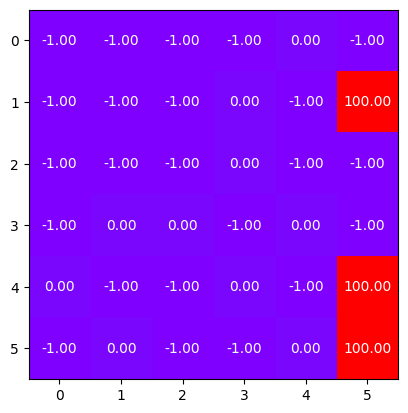



Final Convergence Value Matrix:


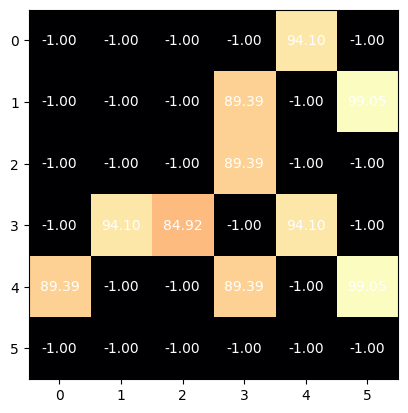



Best Path: [0, 4, 5]


In [8]:
# Function to print the best path found using the Q-matrix
def print_best_path(q_matrix):
    current_state = 0
    path = [current_state]
    while current_state != GOAL_STATE:
        action = np.argmax(q_matrix[current_state, :])
        path.append(action)
        current_state = action
    print("Best Path:", path)

if __name__ == "__main__":
    # Run the Q-learning algorithm
    final_q_matrix = q_learning()

    # Print the initial matrix with goal values
    print("Initial Matrix:")
    initial_matrix = np.full((NUM_ROOMS, NUM_ROOMS), -1, dtype=int)
    for i, row in enumerate(initial_matrix):
        for j in paths[i]:
            if j == GOAL_STATE:
                initial_matrix[i, j] = 100
            else:
                initial_matrix[i, j] = 0
    print_matrix(initial_matrix, cmap='rainbow', vmin=-1, vmax=100)
    print("\n")

    # Print the final Q-matrix after convergence
    print("Final Convergence Value Matrix:")
    print_matrix(final_q_matrix, cmap='magma', vmin=-1, vmax=np.max(final_q_matrix))
    print("\n")

    # Print the best path found using the Q-matrix
    print_best_path(final_q_matrix)

1. The Q-learning algorithm successfully determines the optimal path after 1000 episodes, highlighting the effectiveness of reinforcement learning in autonomously acquiring and refining strategies.

2. The iterative learning process exemplifies the adaptability and efficiency of Q-learning, showcasing its capability to solve complex decision-making problems within diverse environments.

3. The best path identified through the learned Q-matrix is 0 -> 4 -> 5, emphasizing the algorithm's ability to navigate through different states to reach the goal state autonomously.